In [4]:
import pandas as pd

my_file = "/Users/dilagurer/Desktop/adult.data"

df = pd.read_csv(my_file, header=None)

print(df.head())


   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [5]:
import pandas as pd

my_file = "/Users/dilagurer/Desktop/adult.data"

df = pd.read_csv(my_file, header=None, na_values='?')


print(df.head())


df_clean = df.dropna()

print(df_clean.head())


   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [8]:
from sklearn.model_selection import train_test_split


X = df_clean.drop(14, axis=1)  
y = df_clean[14]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training of the set shape (X, y):", X_train.shape, y_train.shape)
print("Testing the set shape (X, y):", X_test.shape, y_test.shape)


Training of the set shape (X, y): (26048, 14) (26048,)
Testing the set shape (X, y): (6513, 14) (6513,)


In [20]:
from sklearn.preprocessing import OneHotEncoder

X_encoded = pd.get_dummies(df_clean[[5]], drop_first=True)

X = X_encoded
y = df_clean[14]  # my target variable is the income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))



Accuracy: 0.7587901120835252


/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4942
        >50K       0.00      0.00      0.00      1571

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.58      0.76      0.65      6513



/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.linear_model import LogisticRegression

parameter_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

my_grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

my_grid_search.fit(X_train, y_train)

best_parameter = my_grid_search.best_params_
print("Best Hyperparameters:", best_parameter)

best_log_model = grid_search.best_estimator_

y_pred_best_log_model = best_log_model.predict(X_test)


accuracy_best_log_model = accuracy_score(y_test, y_pred_best_log_model)
print("Best LR Accuracy:", accuracy_best_log_model)


NameError: name 'GridSearchCV' is not defined

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

my_file_path = "/Users/dilagurer/Desktop/adult.data"
df = pd.read_csv(my_file_path, header=None)

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
df.columns = columns

df.dropna(inplace=True)

df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 
                                         'occupation', 'relationship', 'race', 'sex', 
                                         'native-country'], drop_first=True)
l_encoder = LabelEncoder()
df_encoded['income'] = l_encoder.fit_transform(df_encoded['income'])

X = df_encoded.drop(columns=['age'])
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)


Accuracy: 1.0


Accuracy: 0.8179026562260096


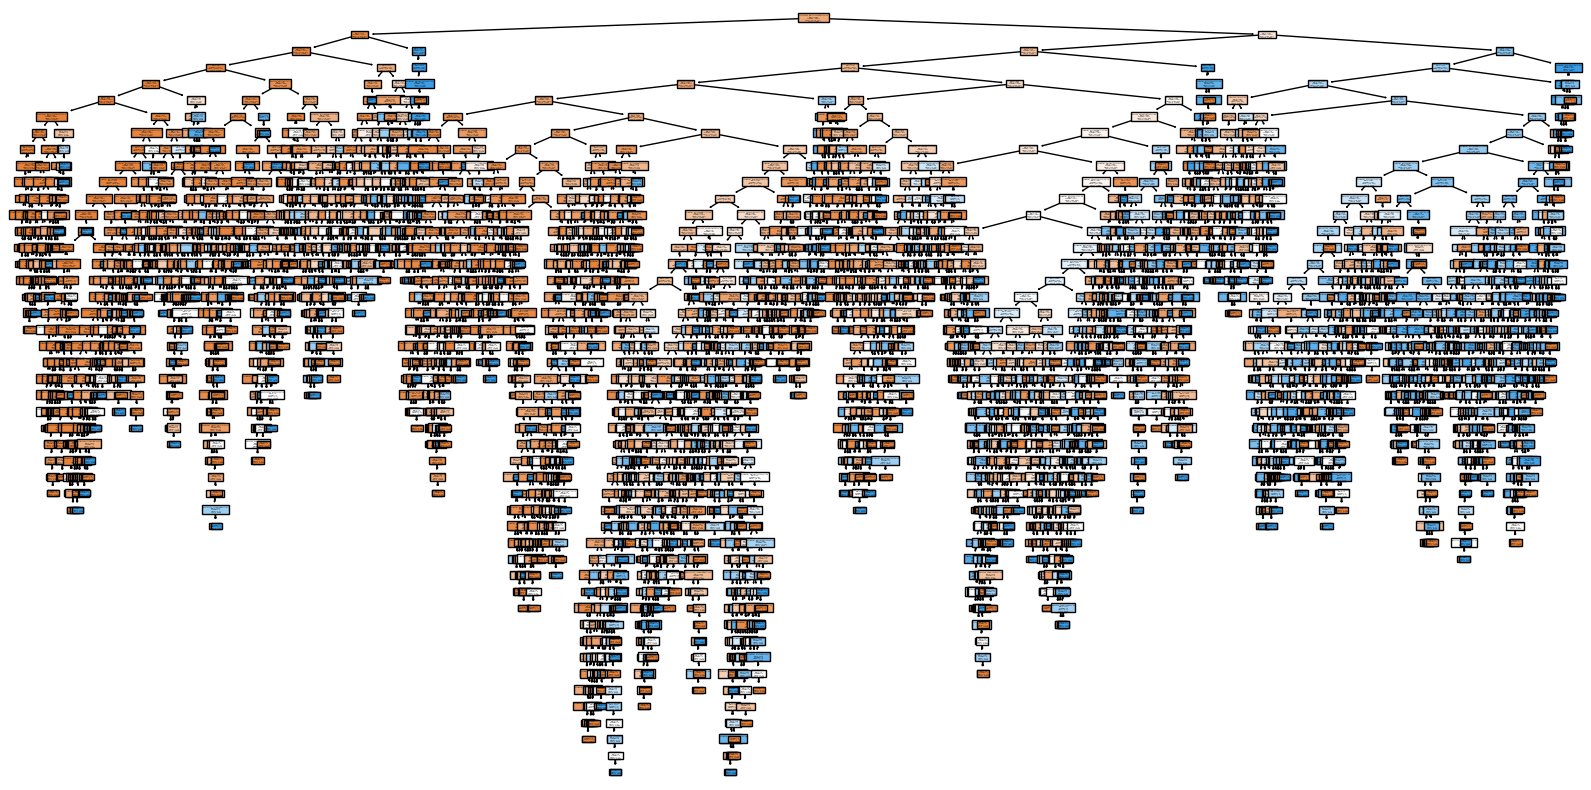

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

my_file_path = "/Users/dilagurer/Desktop/adult.data"
df = pd.read_csv(my_file_path, header=None)

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
df.columns = columns

df.dropna(inplace=True)

df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 
                                         'occupation', 'relationship', 'race', 'sex', 
                                         'native-country'], drop_first=True)
l_encoder = LabelEncoder()
df_encoded['income'] = l_encoder.fit_transform(df_encoded['income'])

X = df_encoded.drop(columns=['income'])
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

feature_names = X.columns.tolist()
class_names = l_encoder.classes_.tolist()

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


best_parameter = grid_search.best_params_
print("Best Hyperparameters:", best_parameter)


best_tree_model = grid_search.best_estimator_

y_preding_best_tree = best_tree_model.predict(X_test)

accuracy_best_tree = accuracy_score(y_test, y_predicting_best_tree)
print("Best DT Accuracy:", accuracy_best_tree)



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


NameError: name 'y_predicting_best_tree' is not defined

RF Accuracy: 0.8582834331337326


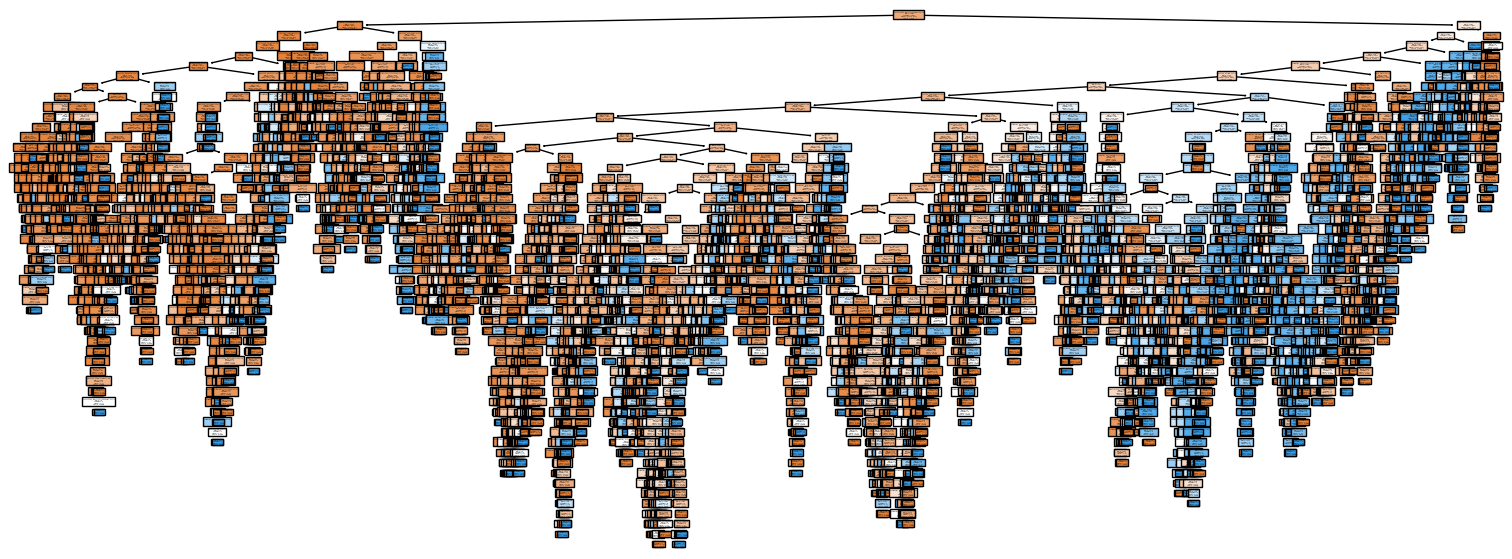

In [26]:
from sklearn.ensemble import RandomForestClassifier

my_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
my_forest_model.fit(X_train, y_train)

y_predicting_forest = my_forest_model.predict(X_test)

accuracy_forest = accuracy_score(y_test, y_predicting_forest)
print("RF Accuracy:", accuracy_forest)

plt.figure(figsize=(19, 7))
plot_tree(my_forest_model.estimators_[0], filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
print("Best Hyperparameters:", best_parameters)

my_best_forest_model = grid_search.best_estimator_

y_pred_best_forest = my_best_forest_model.predict(X_test)

accuracy_best_forest = accuracy_score(y_test, y_pred_best_forest)
print("Best RF Accuracy:", accuracy_best_forest)

plt.figure(figsize=(19, 8))
plot_tree(best_forest_model.estimators_[0], filled=True, feature_names=feature_names, class_names=label_encoder.classes_)
plt.show()


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Accuracy: 1.0


InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array([' <=50K', ' >50K'], dtype=object) instead.

<Figure size 2000x1000 with 0 Axes>

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


my_logistic_regression_model = LogisticRegression()
my_logistic_regression_model.fit(X_train, y_train)

my_decision_tree_model = DecisionTreeClassifier()
my_decision_tree_model.fit(X_train, y_train)

my_random_forest_model = RandomForestClassifier()
my_random_forest_model.fit(X_train, y_train)

log_REG_scores = cross_val_score(best_lr_model, X_train, y_train, cv=5, scoring='accuracy')
print("LR Cross-Validation Accuracy: ", log_REG_scores.mean())

d_tree_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')
print("DT Cross-Validation Accuracy: ", d_tree_scores.mean())

random_forest_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("RF Cross-Validation Accuracy: ", random_forest_scores.mean())


NameError: name 'best_lr_model' is not defined

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

models = {
    'Logistic Regression': logistic_regression_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model
}

scoring = ['accuracy', 'precision', 'recall', 'f1']

my_evaluation_results = {}

for name, model in models.items():

    cross_validation_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    mean_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}
    std_scores = {metric: np.std(cv_results[f'test_{metric}']) for metric in scoring}
    
    my_evaluation_results[name] = {'mean_scores': mean_scores, 'std_scores': std_scores}
    
    print(f"Metrics for {name}:")
    for metric in scoring:
        print(f"{metric.capitalize()}: {mean_scores[metric]:.4f} (std: {std_scores[metric]:.4f})")
    print()
    
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, model.predict(X_test)))
    print()
    
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, model.predict(X_test)))
    print()


/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dilagurer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Metrics for Logistic Regression:
Accuracy: 0.8468 (std: 0.0663)
Precision: 0.7774 (std: 0.0929)
Recall: 0.4713 (std: 0.2653)
F1: 0.5602 (std: 0.2256)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.78      0.69      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.84      0.81      0.83      6513
weighted avg       0.87      0.88      0.87      6513


Confusion Matrix for Logistic Regression:
[[4634  308]
 [ 490 1081]]

Metrics for Decision Tree:
Accuracy: 1.0000 (std: 0.0000)
Precision: 1.0000 (std: 0.0000)
Recall: 1.0000 (std: 0.0000)
F1: 1.0000 (std: 0.0000)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4942
           1       1.00      1.00      1.00      1571

    accuracy                           1.00      6513


In [36]:

y_predicting_dt = best_dt_model.predict(X_test)

print("DT Evaluation Metrics:")
print(classification_report(y_test, y_predicting_dt))
print("The Confusion Matrix:")
print(confusion_matrix(y_test, y_predicting_dt))


NameError: name 'best_dt_model' is not defined

In [37]:

y_predicting_rf = best_rf_model.predict(X_test)

print("RF Evaluation Metrics:")
print(classification_report(y_test, y_predicting_rf))
print("The Confusion Matrix:")
print(confusion_matrix(y_test, y_predicting_rf))


NameError: name 'best_rf_model' is not defined

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name):
    y_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_prediction)}")
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(y_test, y_prediction)}\n")

my_logistic_model = LogisticRegression(max_iter=1000)
my_logistic_model.fit(X_train, y_train)
evaluate_model(my_logistic_model, X_test, y_test, "LR")

my_tree_model = DecisionTreeClassifier(random_state=42)
my_tree_model.fit(X_train, y_train)
evaluate_model(my_tree_model, X_test, y_test, "DT")

my_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
evaluate_model(forest_model, X_test, y_test, "Random Forest")


Logistic Regression Accuracy: 0.7993
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4942
           1       0.73      0.27      0.39      1571

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.80      0.76      6513

Logistic Regression Confusion Matrix:
[[4784  158]
 [1149  422]]

Decision Tree Accuracy: 0.8179
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4942
           1       0.62      0.64      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.75      6513
weighted avg       0.82      0.82      0.82      6513

Decision Tree Confusion Matrix:
[[4325  617]
 [ 569 1002]]

Random Forest Accuracy: 0.8583
Random Forest Classification Report:
    